<a href="https://colab.research.google.com/github/bisht-prachi/Some-Statistical-Modeling-Projects-MITx-MicroMasters-/blob/main/CAVIAR_criminal_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Part I. CAVIAR Criminal Network Analysis

In this project, we analyze a time-varying criminal network disrupted by police interventions over an extended investigation. The dataset, found in the `CAVIAR` directory, contains 11 adjacency matrices (`phase1.csv` to `phase11.csv`) corresponding to two-month wiretap periods during a Canadian drug trafficking investigation from 1994–1996.

The **CAVIAR project** was a collaborative operation between the Montréal police and the RCMP. Rather than arresting suspects immediately, the strategy focused on disrupting operations by seizing shipments. Arrests were made only at the end, allowing us to study network evolution under pressure.

#### Background

* **110 players** are involved:

  * IDs `1–82`: Traffickers
  * IDs `83–110`: Non-traffickers (investors, accountants, import/export agents)
* The main target: **Daniel Serero (n1)** – orchestrated marijuana imports via Morocco and later shifted to cocaine via Colombia.
* A total of **11 seizures** occurred, with detailed info provided for phases 4–11. The most significant was in **Phase 10**, involving **2,200 kg of marijuana** worth **\$18.7 million**.

#### Seizure Summary (Selected Phases)

| Phase | Seizures | Value (\$) | Drugs Seized                   |
| ----- | -------- | ---------- | ------------------------------ |
| 4     | 1        | 2,500,000  | 300 kg marijuana               |
| 6     | 3        | 1,300,000  | 30 kg marijuana + 2 kg cocaine |
| 7     | 1        | 3,500,000  | 401 kg marijuana               |
| 10    | 1        | 18,700,000 | 2,200 kg marijuana             |
| 11    | 2        | 1,300,000  | 23 kg cocaine                  |

#### 🎯 Objective

We will analyze the **structure and dynamics** of the network over time, focusing on:

* Changes in connectivity after police disruptions
* Roles of key players (e.g., Serero, Perlini, Morales)
* Resilience and adaptation of the network under increasing stress

Wiretap matrices track communication frequencies, revealing how relationships evolved across phases.

For reference, see:
📄 [Modeling Verdict Outcomes Using Social Network Measures: The Watergate and Caviar Network Cases](https://www.researchgate.net/publication/292304919_Modeling_Verdict_Outcomes_Using_Social_Network_Measures_The_Watergate_and_Caviar_Network_Cases)



In [6]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [3]:
import pandas as pd
import networkx as nx

### Gather the data

In [4]:
phases = {}
G = {}
for i in range(1,12):
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

    G_nodes = G[i].nodes()
    G_edges = G[i].edges()

    print(f'Phase {i}:'+ str(len(G_nodes)) + ' nodes, ' + str(len(G_edges)) + ' edges')

Phase 1:15 nodes, 18 edges
Phase 2:24 nodes, 28 edges
Phase 3:33 nodes, 56 edges
Phase 4:33 nodes, 48 edges
Phase 5:32 nodes, 39 edges
Phase 6:27 nodes, 47 edges
Phase 7:36 nodes, 49 edges
Phase 8:42 nodes, 58 edges
Phase 9:34 nodes, 44 edges
Phase 10:42 nodes, 50 edges
Phase 11:41 nodes, 50 edges


## Evolving size of the network

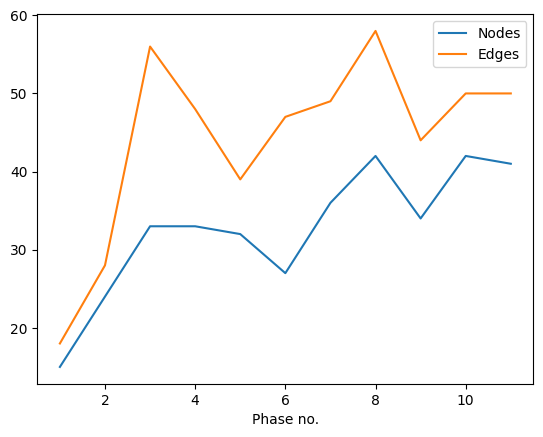

In [ ]:
plt.plot(range(1,12), [ G[i].number_of_nodes() for i in range(1,12) ], label="Nodes")
plt.plot(range(1,12), [ G[i].number_of_edges() for i in range(1,12) ], label="Edges")
plt.xlabel('Phase no.')
plt.legend()
plt.show()

The figure above shows the evolution of nodes and edges with phases. There is sharp spike from phase no. n=1 to n=3 ((15 nodes, 18 edges) to (33 nodes, 56 edges)). This rise can be explained by the fact that police are gradually gathering intel and building a network by adding newer players. Subsequently, at n=4, the network was met with a shock in the form of raid and seizure. This is evident in the dip in number of edges and nodes at n=4 while the number of nodes was more or less intact. After a temporary disruption, the network again seems to reorganizing and building up to stability.

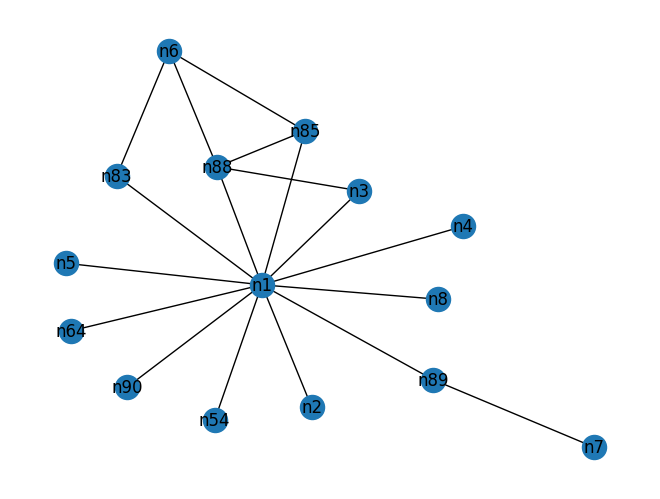

In [ ]:
nx.draw(G[1], pos=nx.drawing.nx_agraph.graphviz_layout(G[1]), with_labels=True)

The network in phase 1. The numbers denote player ids. Clearly, n1 has high degree of connectivity. Recalling different measures of cnetrality:

Degree Centrality (DC): Measures the number of direct connections an actor has. A high degree centrality suggests that the actor is well-connected and may play a role in communication, recruitment, transportation logistics, finance etc. However, this kind of actor is not necessarily the ringleader. This actor is more of a henchman or a regional leader. A leader would instead want to minimize their exposure and limit direct connections.

Eigenvector Centrality (EC): Reflects not only an actor’s connections but also the importance of those connections. Actors with high EC are linked to other influential members. These actors play a strategic role, they are responsible for resource management and operations. They play more of deputy leader/right hand role but not necessarily the leader themselves.

Betweenness Centrality (BC): Captures how often an actor lies on the shortest paths between others. BC pinpoints nodes that serve as 'gatekeepers' within a network. Actors with high BC signifies control over critical communication and resource flows. These individuals act as intermediaries, coordinating operations while maintaining secrecy.

*Betweeness centrality is likely the most useful for identifying the key players of illicit activities.*

Following figure shows the CAVIAR network through the phases. Warm colors represent a high betweenness centrality.


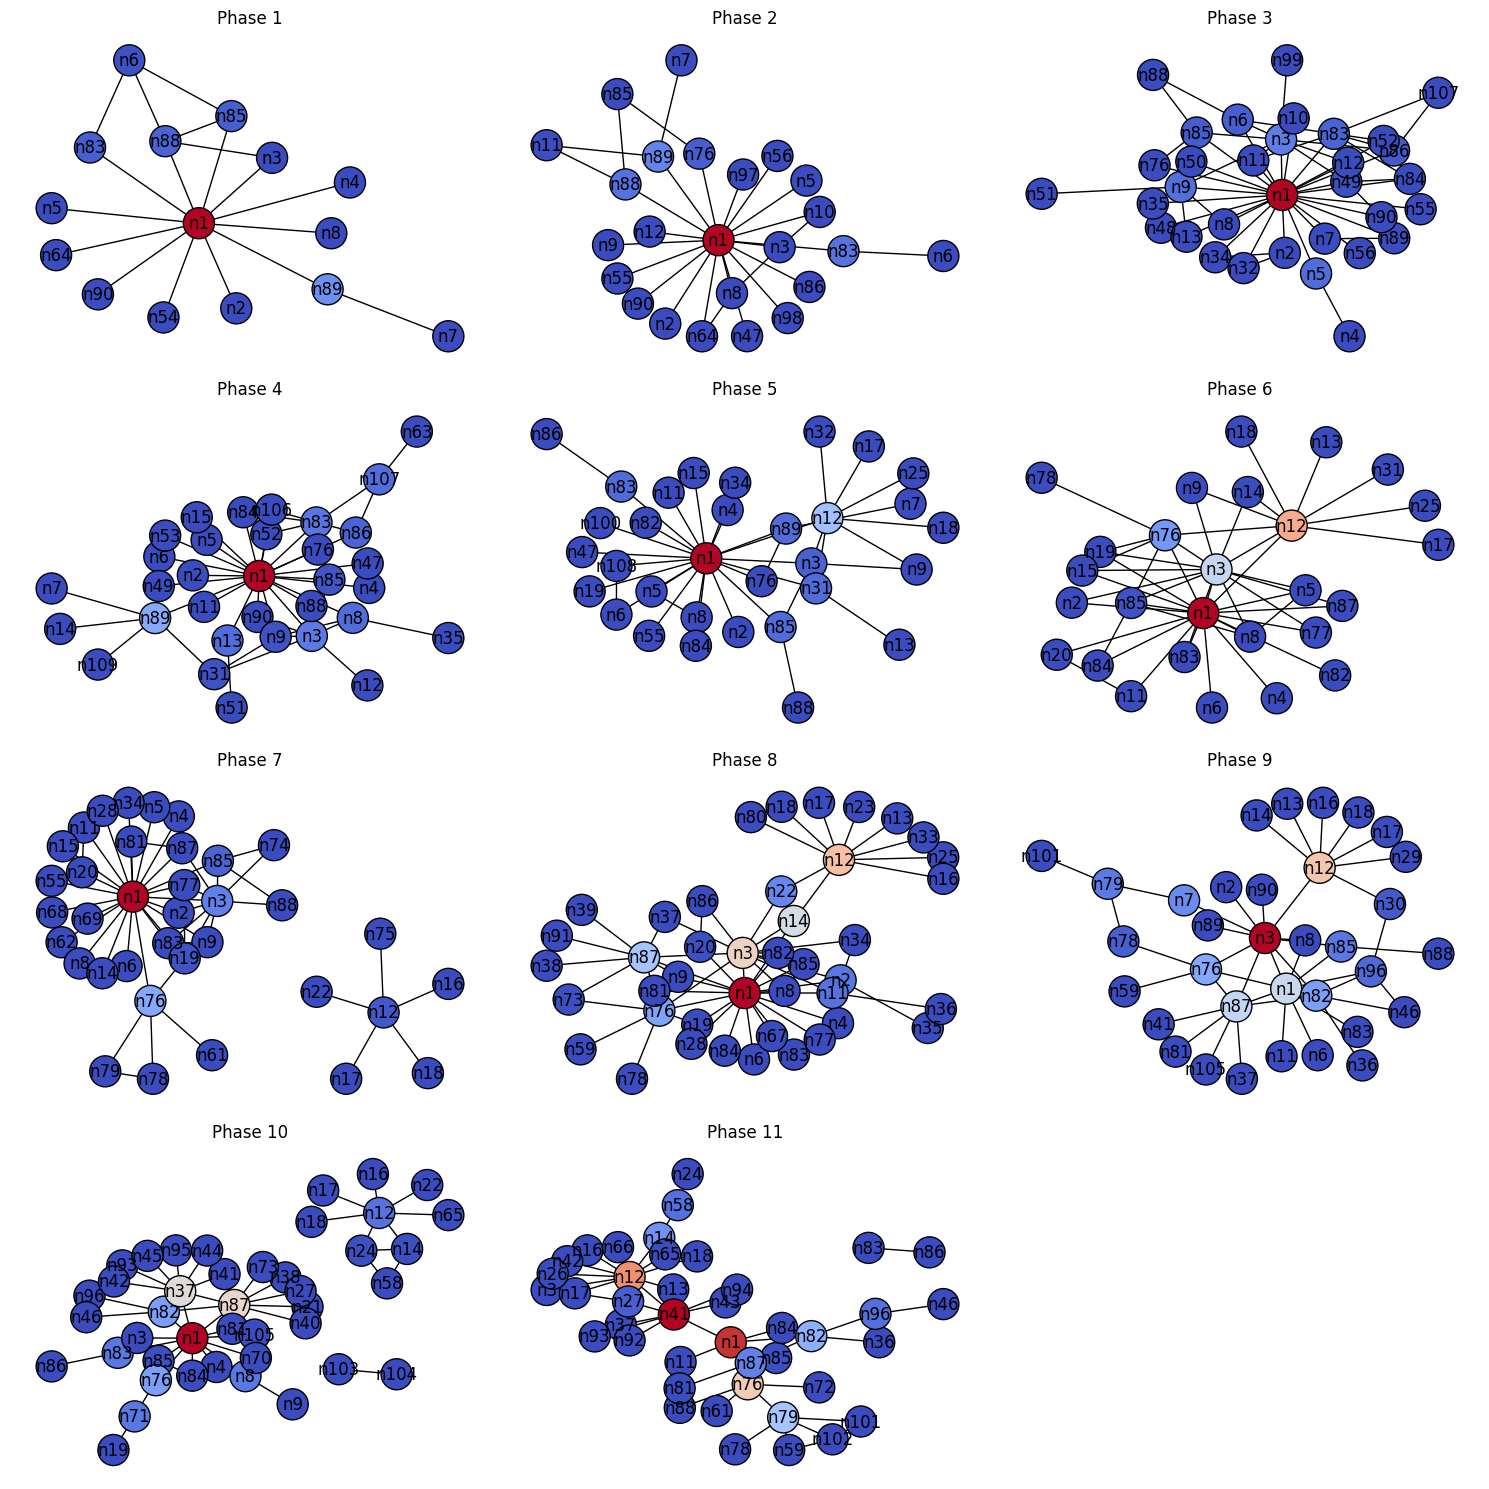

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Create 4x3 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i in range(1, 12):  # Loop through 11 phases
    ax = axes[i - 1]
    pos = nx.drawing.nx_agraph.graphviz_layout(G[i])  # Compute layout

    # Example: Coloring nodes based on degree centrality
    centrality = nx.betweenness_centrality(G[i])
    node_colors = [centrality[node] for node in G[i].nodes()]  # Use centrality values for color mapping

    nx.draw(
        G[i],
        pos=pos,
        with_labels=True,
        arrows=True,
        ax=ax,
        node_color=node_colors,  # Apply colors
        cmap=plt.cm.coolwarm,  # Choose a colormap (e.g., viridis, plasma, coolwarm)
        node_size=500,  # Increase node size
        edgecolors="black"  # Add black border to circles
    )

    ax.set_title(f"Phase {i}")

# Hide the empty subplot (12th one)
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


## Estimating normalized degree centrality, betweenness centrality and eigen-vector centrality

In [14]:
def get_metric(func):
    return {i: func(G[i]) for i in range (1,12)}


In [15]:
%%timeit -n 1 -r 1
deg_cen = get_metric(nx.degree_centrality)

535 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
%%timeit -n 1 -r 1
bet_cen = get_metric(lambda g: nx.betweenness_centrality(g, normalized = True))

54.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
%%timeit -n 1 -r 1
eig_cen = get_metric(nx.eigenvector_centrality)

26.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Out of the three centrality metrics analyzed, the algorithm for **degree centrality** was the fastest, followed by **betweenness centrality**, and finally **eigenvector centrality**, which was the most computationally intensive.

In [13]:
#constructing dataframes for each of the metrics where column represents players and rows represent the chronological phases
deg_df = pd.DataFrame.from_dict(deg_cen, orient='index')
bet_df = pd.DataFrame.from_dict(bet_cen, orient='index')
eig_df = pd.DataFrame.from_dict(eig_cen, orient='index')

In [18]:
deg_df

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,...,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
1,0.857143,0.071429,0.142857,0.142857,0.142857,0.071429,0.285714,0.214286,0.071429,0.071429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.826087,NaN,0.130435,0.086957,0.130435,0.043478,0.130435,0.086957,0.043478,0.043478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.843750,0.031250,0.062500,0.250000,0.281250,0.062500,0.062500,0.125000,0.062500,0.093750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.718750,0.031250,0.187500,0.218750,0.218750,0.031250,0.062500,0.156250,0.062500,0.031250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.709677,0.032258,0.096774,0.064516,0.161290,0.064516,0.032258,0.096774,NaN,0.032258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.692308,0.038462,NaN,0.076923,0.538462,0.115385,NaN,0.192308,NaN,0.076923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.685714,0.028571,NaN,0.085714,0.285714,0.028571,0.057143,0.114286,NaN,0.057143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.487805,0.024390,NaN,0.024390,0.317073,NaN,NaN,0.073171,NaN,0.097561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.303030,NaN,0.030303,0.030303,0.333333,NaN,0.030303,0.090909,0.030303,0.030303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.317073,0.024390,NaN,0.048780,0.024390,NaN,NaN,0.073171,NaN,NaN,...,0.02439,0.02439,0.02439,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Entries with NaN indicate the player was not operational in the said phase, per our knowledge

In [ ]:
# estimating the mean centralities, averaged over all the phases (excluding NaNs)
mean_deg_centrality = deg_df.where(deg_df != np.nan).mean(axis=0)
mean_bet_centrality = bet_df.where(bet_df != np.nan).mean(axis=0)
mean_eig_centrality = eig_df.where(eig_df != np.nan).mean(axis=0)

print("Mean Degree Centrality (Nonzero Entries Only):\n", mean_deg_centrality.sort_values(ascending=False).head(5))
print("Mean Betweenness Centrality (Nonzero Entries Only):\n", mean_bet_centrality.sort_values(ascending=False).head(5))
print("Mean Eigenvector Centrality (Nonzero Entries Only):\n", mean_eig_centrality.sort_values(ascending=False).head(5))


Mean Degree Centrality (Nonzero Entries Only):
 n1     0.601485
n3     0.223505
n12    0.187982
n87    0.165478
n76    0.123459
dtype: float64
Mean Betweenness Centrality (Nonzero Entries Only):
 n1     0.655051
n41    0.184687
n12    0.184318
n3     0.129403
n87    0.112433
dtype: float64
Mean Eigenvector Centrality (Nonzero Entries Only):
 n1     0.546391
n3     0.298095
n87    0.258647
n41    0.234188
n27    0.204104
dtype: float64


Player **n1** has the highest centrality scores across all metrics, indicating their central role in the network. Other key players, based on high centrality values, include **n3**, **n12**, **n87**, and **n41**.


In [ ]:
import pandas as pd

# Assuming df, bet_df, and eig_df are your dataframes
actors = ["n1", "n3", "n12", "n83"]

# Extract degree centrality
deg_centrality = deg_df[actors]

# Extract betweenness centrality
bet_centrality = bet_df[actors]

# Extract eigenvector centrality
eig_centrality = eig_df[actors]

# Combine into a single dataframe for easier comparison
centrality_df = pd.concat(
    [deg_centrality, bet_centrality, eig_centrality],
    keys=["Degree Centrality", "Betweenness Centrality", "Eigenvector Centrality"]
)

# Display the result
print(centrality_df)


                                 n1        n3           n12           n83
Degree Centrality      1   0.857143  0.142857  0.000000e+00  1.428571e-01
                       2   0.826087  0.130435  4.347826e-02  8.695652e-02
                       3   0.843750  0.281250  6.250000e-02  2.500000e-01
                       4   0.718750  0.218750  3.125000e-02  2.187500e-01
                       5   0.709677  0.161290  2.580645e-01  6.451613e-02
                       6   0.692308  0.538462  3.846154e-01  7.692308e-02
                       7   0.685714  0.285714  1.428571e-01  8.571429e-02
                       8   0.487805  0.317073  2.439024e-01  2.439024e-02
                       9   0.303030  0.333333  2.424242e-01  3.030303e-02
                       10  0.317073  0.024390  1.707317e-01  4.878049e-02
                       11  0.175000  0.025000  3.000000e-01  2.500000e-02
Betweenness Centrality 1   0.906593  0.000000  0.000000e+00  3.663004e-02
                       2   0.942688  0

## Key Players in the CAVIAR Network

In the CAVIAR network, **Daniel Serero (n1)** consistently ranks highest across all centrality metrics—**degree**, **betweenness**, and **eigenvector centrality**—indicating his role as the central figure in the operation.

Other key players include:

- **Pierre Perlini (n3)**: Serero’s lieutenant, ranks second in degree and eigenvector centrality.
- **Wallace Lee (n85)**: Chief accountant, recognized for high eigenvector centrality.
- **Ernesto Morales (n12)**: The intermediary for cocaine imports, stands out for high **betweenness centrality**, underlining his importance in bridging communication between network components.
- **Patrick Lee (n87)** and **Alain Levy (n83)**: Identified as important due to consistently high rankings across all metrics.

As discussed in Q.d, targeting individuals with **high betweenness centrality** is crucial for disrupting the network's flow of information. Players **n1**, **n3**, and **n12** stand out as central figures by all three metrics.

Notably, **player n41** emerges as a pivotal figure in the later phases (particularly in **Phase 11**), especially when zero imputation is avoided for missing values. In **Figure 2**, we observe n41 directly connected to n1 and serving as a bridge between two major clusters, highlighting their growing influence in the network.

---

### 📊 Summary of Top Players by Centrality Measures

| Rank | Node | Name | Mean Degree Centrality | Mean Betweenness Centrality | Mean Eigenvector Centrality |
|------|------|------|------------------------|-----------------------------|-----------------------------|
| 1    | n1   | Daniel Serero, Mastermind  | 0.6015                     | 0.6551                      | 0.5464                      |
| —    | n41  | —                          | 0.1014                     | 0.5541                      | 0.2342                      |
| 2    | n3   | Pierre Perlini, Lieutenant | 0.2235                     | 0.1294                      | 0.2981                      |
| 3    | n12  | Ernesto Morales, Organizer | 0.1709                     | 0.1676                      | 0.1419                      |
| 4    | n85  | Wallace Lee, Accountant    | 0.1180                     | 0.0237                      | 0.1906                      |
| 5    | n76  | Gabrielle Casale           | 0.1122                     | 0.0838                      | 0.1659                      |
| 6    | n87  | Patrick Lee, Investor      | 0.0902                     | 0.0613                      | 0.1411                      |
| 7    | n83  | Alain Levy, Investor       | 0.0958                     | 0.0318                      | 0.1535                      |


## Evolution of the CAVIAR Network Across Phases

**Phases 1–3: Initial Expansion**  
The network grows as police begin mapping connections. It centers around **Daniel Serero (n1)** and his lieutenant **Pierre Perlini (n3)**, with new nodes added as more players are identified.

**Phases 3–5: Contraction Post-Seizure**  
Following the first drug seizure, the number of edges drops from 56 to 39. This indicates a temporary contraction in activity. The network structure starts shifting to support the **expansion of cocaine imports** under **Ernesto Morales (n12)**.

**Phases 6–8: Strategic Expansion**  
The network expands again, coinciding with multiple drug seizures. **Perlini** assumes a more central role—likely to insulate **Serero** from direct risk. Notably, **Morales (n12)** forms an **independent cluster** in Phases 7 and 10, aligning with two major marijuana seizures (401 kg and 2200 kg respectively). This suggests compartmentalization within the organization.

**Phases 9–11: Decentralization and Fragmentation**  
Serero and Perlini begin **cutting ties and decentralizing** the network, likely in response to heightened scrutiny. Key roles begin shifting to players like:
- **Patrick Lee (n87)**
- **Gabrielle Casale (n76)**
- **n41**, who becomes increasingly central by Phase 11.

The **massive 2200 kg marijuana seizure in Phase 10** likely prompts this strategic fragmentation.  
By **Phase 11**, the network consists of **two comparably sized clusters**—one centered around **Serero** and the other around **Morales**, connected through a **single intermediary node**. This final structure suggests a deliberate effort to minimize risk and isolate operational arms of the network.


## **Visualization of Hub and Authority Dynamics Across Phases**

To analyze the evolution of influence and information flow within the dynamic network across 11 discrete phases, we compute and visualize **hub** and **authority scores** for key players using the HITS (Hyperlink-Induced Topic Search) algorithm.

#### **Purpose of Analysis**
- **Hub scores** reflect how actively a node connects to influential nodes—indicating **outgoing communication** or initiative.
- **Authority scores** reflect how often a node is referred to by strong hubs—indicating **credibility or centrality in receiving communication**.


In [19]:
# Initialize dictionaries to store phases and graphs
phases = {}
G = {}

# Initialize empty DataFrames for hub and authority scores
hub_scores_df = pd.DataFrame()
authority_scores_df = pd.DataFrame()

# Loop through each phase
for i in range(1, 12):
    var_name = f"phase{i}"
    file_name = f"https://raw.githubusercontent.com/ragini30/Networks-Homework/main/{var_name}.csv"

    # Load adjacency matrix
    phases[i] = pd.read_csv(file_name, index_col=["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns

    # Convert adjacency matrix to binary
    phases[i][phases[i] > 0] = 1

    # Create directed graph
    G[i] = nx.from_pandas_adjacency(phases[i], create_using=nx.DiGraph())
    G[i].name = var_name

    # Extract the largest weakly connected component (to avoid convergence issues)
    if not nx.is_weakly_connected(G[i]):
        largest_component = max(nx.weakly_connected_components(G[i]), key=len)
        G[i] = G[i].subgraph(largest_component).copy()

    # Compute HITS scores with adjusted parameters
    try:
        hubs, authorities = nx.hits(G[i], max_iter=1000000, tol=1e-4, normalized=True)
    except nx.PowerIterationFailedConvergence:
        print(f"HITS did not converge for {var_name}")

        # Default to zero scores in case of failure
        hubs = {node: 0 for node in G[i].nodes()}
        authorities = {node: 0 for node in G[i].nodes()}

    # Convert hub and authority scores to DataFrames
    hub_scores = pd.DataFrame.from_dict(hubs, orient='index', columns=[f'phase{i}'])
    authority_scores = pd.DataFrame.from_dict(authorities, orient='index', columns=[f'phase{i}'])

    # Concatenate the scores to the main DataFrames
    hub_scores_df = hub_scores_df.join(hub_scores, how='outer') if not hub_scores_df.empty else hub_scores
    authority_scores_df = authority_scores_df.join(authority_scores, how='outer') if not authority_scores_df.empty else authority_scores


In [20]:
# List of players to extract
players = ['n1', 'n3', 'n12', 'n85', 'n76', 'n87', 'n83', 'n41']

# Extract the hub scores for the specified players
hub_scores_df.loc[players]
# Print the result
# print(selected_hub_scores)

,phase1,phase2,phase3,phase4,phase5,phase6,phase7,phase8,phase9,phase10,phase11
n1,0.421657,0.673046,0.359712,0.361366,4.306981e-01,0.099099,0.254334,0.253021,0.193561,0.238653,0.111802
n3,0.094478,0.085760,0.084580,0.089302,8.400977e-02,0.099344,0.159159,0.126588,0.242786,0.029219,0.017407
n12,NaN,0.004211,-0.000000,0.020340,7.339324e-02,0.094357,NaN,0.018137,0.022105,NaN,0.060022
n85,0.122440,0.085760,-0.000000,0.072989,2.893700e-02,0.055341,0.037527,0.068639,0.043222,0.045129,0.055469
n76,NaN,-0.000000,0.033623,0.024352,3.981950e-02,0.056882,0.060490,0.074136,0.051379,0.029219,0.136324
n87,NaN,NaN,NaN,NaN,NaN,0.049453,0.055878,0.109853,0.097486,0.218339,0.078722
n83,0.066874,-0.000000,0.092338,0.089374,1.423393e-18,0.029457,0.018718,-0.000000,-0.000000,0.030857,NaN
n41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000,0.028857,0.067708


In [21]:
authority_scores_df.loc[players]

,phase1,phase2,phase3,phase4,phase5,phase6,phase7,phase8,phase9,phase10,phase11
n1,0.079101,0.006216,0.043210,0.041497,0.030840,0.182293,0.093947,0.071233,0.082272,0.076596,0.108822
n3,0.094653,0.056135,0.050874,0.050496,0.059293,0.123743,0.043509,0.081828,0.040782,0.033213,-0.000000
n12,NaN,-0.000000,0.037930,0.009170,0.067716,0.051920,NaN,0.009040,0.049478,NaN,0.053240
n85,0.094653,-0.000000,0.043611,0.060456,0.050511,0.051002,0.060620,0.046005,0.073204,0.035075,0.076324
n76,NaN,0.063288,0.030709,0.044602,0.047910,0.092315,0.044024,0.031945,0.073204,0.041708,0.060828
n87,NaN,NaN,NaN,NaN,NaN,-0.000000,0.035672,0.050018,0.097355,0.054439,0.079519
n83,-0.000000,0.059497,0.042971,0.046915,0.050511,0.042859,0.060620,0.030664,0.030666,0.033213,NaN
n41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015445,0.048722,0.045974


<ipython-input-22-bcb398ab9e7e>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-22-bcb398ab9e7e>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


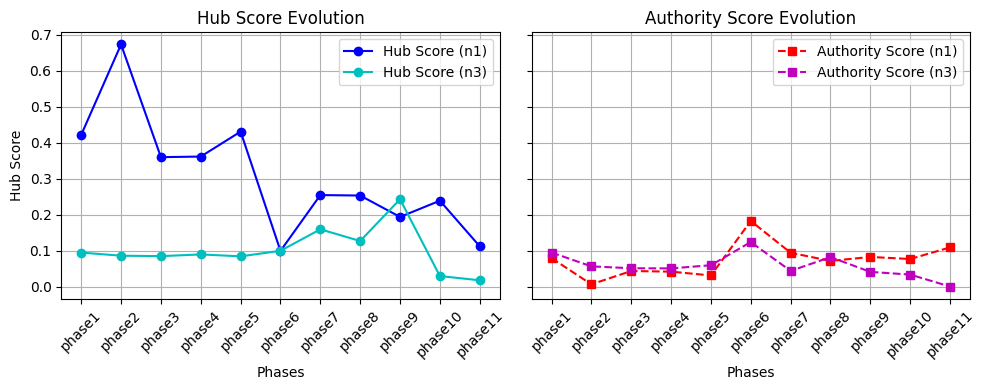

In [22]:
# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot hub scores in the first subplot
axes[0].plot(hub_scores_df.columns, hub_scores_df.loc['n1'], marker='o', linestyle='-', color='b', label='Hub Score (n1)')
axes[0].plot(hub_scores_df.columns, hub_scores_df.loc['n3'], marker='o', linestyle='-', color='c', label='Hub Score (n3)')
axes[0].set_xlabel("Phases")
axes[0].set_ylabel("Hub Score")
axes[0].set_title("Hub Score Evolution")
axes[0].legend()
axes[0].grid(True)

# Plot authority scores in the second subplot
axes[1].plot(authority_scores_df.columns, authority_scores_df.loc['n1'], marker='s', linestyle='--', color='r', label='Authority Score (n1)')
axes[1].plot(authority_scores_df.columns, authority_scores_df.loc['n3'], marker='s', linestyle='--', color='m', label='Authority Score (n3)')
axes[1].set_xlabel("Phases")
axes[1].set_title("Authority Score Evolution")
axes[1].legend()
axes[1].grid(True)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



#### **Key Observations**
- **Serero (n1)** begins with high hub scores, suggesting early initiative in the network, which declines mid-phase and later resurges—indicating a withdrawal and re-entry into key roles.
- **Perlini (n3)** maintains moderate hub and authority scores early on, but their influence fades in later phases.
- **Morales (n12)**, **Patrick Lee (n87)**, and **Gabrielle Casale (n76)** exhibit **late-phase emergence**: their hub and authority scores spike in later phases, indicating a transition of leadership or growing involvement in communication.
- **Node 41**, not initially influential, gains prominence only in the final phases, suggesting a **possible leadership or operational shift** late in the network evolution.

#### **Conclusion**
By visualizing these trends, we gain deeper insight into **temporal shifts in leadership, engagement, and influence**, beyond static network measures. These dynamics are crucial for understanding coordination patterns in complex, evolving systems such as disaster response or crisis management networks.


# Part II. Project

Problem Statement: Explore the degree distribution through the phases. Of the four network models discussed (Erdos-Renyi, configuration, preferential attachment, and small-world), which one(s) are the most realistic? Provide statistical tests if/when appropriate.

## Introduction
Many real-world networks exhibit scale-free properties, where the degree distribution follows a power-law. The Barabási-Albert (BA) model explains this phenomenon through growth and preferential attachment, resulting in a degree distribution of the form [1]:

$P(k)\sim k^{-γ}$


Where $\gamma$ typically lies between 2 and 3. This characteristic suggests that most nodes in the network have few connections, but a few hubs exist with a significantly larger number of connections. The Barabási-Albert (BA) model captures this phenomenon through **growth** and **preferential attachment**. In contrast, other random graph models such as Erdős-Rényi (ER) and Watts-Strogatz (WS) models do not display this behavior.

## Network Models:
- **Barabási-Albert (BA) Model**: Generates a power-law degree distribution due to preferential attachment.
- **Erdős-Rényi (ER) Model**: Produces a Poisson degree distribution and lacks hubs.
- **Configuration Model**: Matches a given degree sequence but does not inherently produce power-law behavior.
- **Watts-Strogatz (WS) Model**: Optimized for small path lengths and high clustering, but does not exhibit scale-free properties.

The goal of this study is to evaluate whether a given network follows a power-law distribution, using statistical tests to assess the best-fitting model.

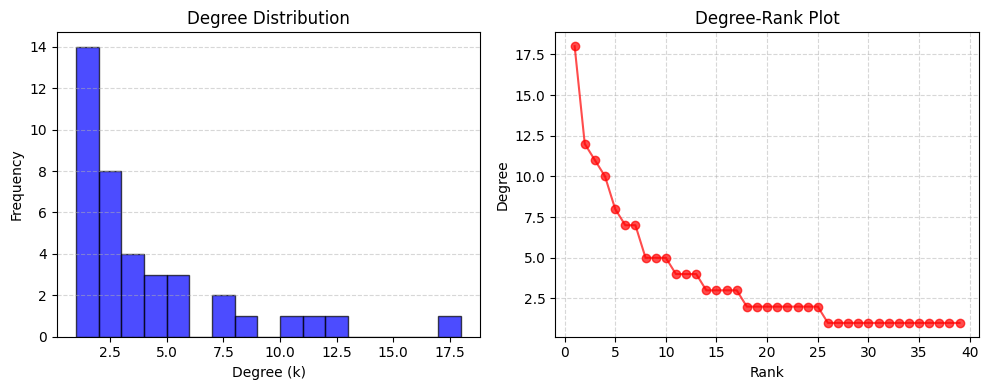

In [ ]:
# Compute degrees and sort them in descending order
degrees = [d for _, d in G[i].degree()]
sorted_degrees = sorted(degrees, reverse=True)
ranks = range(1, len(sorted_degrees) + 1)

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Degree Distribution Histogram
axes[0].hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='b', alpha=0.7, edgecolor='black')
axes[0].set_xlabel("Degree (k)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Degree Distribution")
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# Degree-Rank Plot
axes[1].plot(ranks, sorted_degrees, marker='o', linestyle='-', color='r', alpha=0.7)
axes[1].set_xlabel("Rank")
axes[1].set_ylabel("Degree")
axes[1].set_title("Degree-Rank Plot")
axes[1].grid(True, linestyle="--", alpha=0.5)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



## 2. Methodology

### 2.1 Hypothesis Formulation
We hypothesize that the degree distribution follows a power-law distribution, stated as:
- **Null Hypothesis (H₀)**: The degree distribution follows a power-law distribution.
- **Alternative Hypothesis (H₁)**: The degree distribution does not follow a power-law distribution.


In [ ]:
G[1].degree()

DiDegreeView({'n1': 16, 'n4': 1, 'n89': 4, 'n83': 2, 'n3': 4, 'n5': 1, 'n88': 8, 'n85': 5, 'n90': 1, 'n2': 1, 'n7': 2, 'n54': 1, 'n6': 4, 'n64': 1, 'n8': 1})

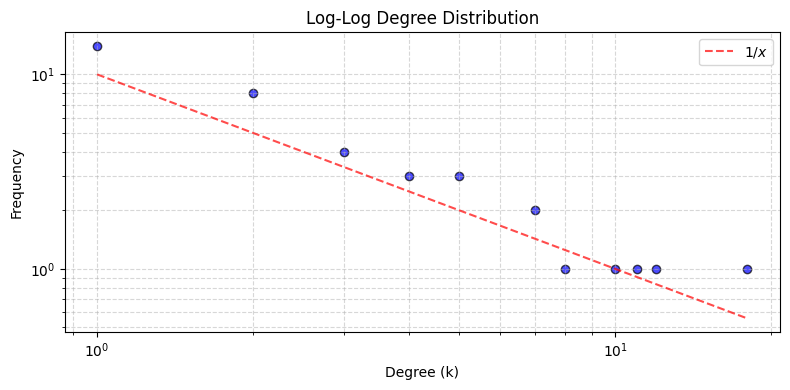

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute degrees and sort them in descending order
degree_counts = {}
for d in G[i].degree():
    degree_counts[d[1]] = degree_counts.get(d[1], 0) + 1

# Convert to sorted arrays
unique_degrees = np.array(sorted(degree_counts.keys()))
frequencies = np.array([degree_counts[d] for d in unique_degrees])

# Sort degrees in descending order for rank plot
sorted_degrees = sorted([d for _, d in G[i].degree()], reverse=True)
ranks = np.arange(1, len(sorted_degrees) + 1)

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 4))

# Log-Log Degree Distribution Scatter Plot
axes.scatter(unique_degrees, frequencies, color='b', alpha=0.7, edgecolors='black')

# Plot the function 1/x^2
x_fit = np.logspace(np.log10(min(unique_degrees)), np.log10(max(unique_degrees)), 100)
y_fit = 10 / (x_fit ** 1)
axes.plot(x_fit, y_fit, linestyle='--', color='r', alpha=0.7, label=r"$1/x$")

axes.set_xscale("log")
axes.set_yscale("log")
axes.set_xlabel("Degree (k)")
axes.set_ylabel("Frequency")
axes.set_title("Log-Log Degree Distribution")
axes.grid(True, which="both", linestyle="--", alpha=0.5)
axes.legend()


# Adjust layout and show the plot
plt.tight_layout()
plt.show()



### 2.2 Estimating Power-Law Parameters
We estimate the power-law parameters through a **log-log regression** of the degree distribution:

$
\log(P(k)) = -\gamma \log(k) + C
$

Where $\gamma$ is the estimated power-law exponent and $C$ is the intercept, representing a scaling factor.


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Compute degree sequence
degrees = [d for _, d in G[i].degree()]

# Compute empirical degree probability distribution
unique_degrees, counts = np.unique(degrees, return_counts=True)
probabilities = counts / sum(counts)

# Restrict to k >= kmin
kmin = 1
restricted_indices = unique_degrees >= kmin
restricted_deg = unique_degrees[restricted_indices]
restricted_cnt_proba = probabilities[restricted_indices]

# Log-transform
# log_restricted_deg = np.log(unique_degrees / kmin)
# log_restricted_cnt_proba = np.log(probabilities)

# # Log-transform
log_restricted_deg = np.log(restricted_deg / kmin)
log_restricted_cnt_proba = np.log(restricted_cnt_proba)

# Linear regression model
restricted_X = log_restricted_deg.reshape(-1, 1)
restricted_lm = LinearRegression().fit(restricted_X, log_restricted_cnt_proba)

# Extract power-law exponent
alpha = -restricted_lm.coef_[0] + 1  # Slope = -(α - 1)

# Print results
print(f"Estimated Power-Law Exponent: {alpha}")
print(f"Intercept: {restricted_lm.intercept_}")

Estimated Power-Law Exponent: 2.0516628122464615
Intercept: -1.0399611455184705


In [ ]:
restricted_lm.score(restricted_X, log_restricted_cnt_proba)

0.9425870426500705

In [ ]:
# Extract slope and intercept from the linear regression model
slope = restricted_lm.coef_[0]  # Negative of the power-law exponent
intercept = restricted_lm.intercept_


### 2.3 Generating Synthetic Power-Law Distribution
Using the estimated exponent $\gamma$ and the intercept $C$, we generate synthetic data that follows a Zipf distribution:

$
k_{\text{syn}} \sim \text{Zipf}(\gamma) \cdot e^C
$


In [ ]:
# Generate synthetic power-law data using the fitted parameters

synthetic_powerlaw = (np.random.zipf(alpha, len(degrees))) #* np.exp(intercept)  # Adjust exponent



### 2.4 Kolmogorov-Smirnov (KS) Test
We use the **Kolmogorov-Smirnov (KS) test** to compare the cumulative distribution functions (CDFs) of the empirical degree distribution and the synthetic power-law distribution. The null hypothesis is not rejected if the p-value exceeds 0.05, suggesting the data plausibly follows a power-law.


KS Statistic: 0.20512820512820512
P-Value: 0.3887659310628042
Fail to reject null hypothesis: Data is likely power-law distributed.


<ipython-input-213-1bd22b866c48>:34: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,30)


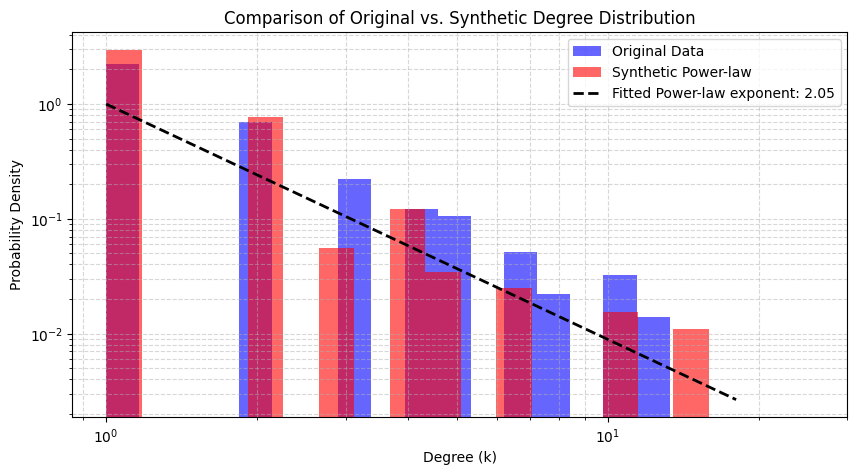

In [ ]:
# Perform KS test between empirical and synthetic power-law data
ks_stat, p_value = stats.ks_2samp(degrees, synthetic_powerlaw)

print(f"KS Statistic: {ks_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject null hypothesis: Data is likely power-law distributed.")
else:
    print("Reject null hypothesis: Data does not follow a pure power-law distribution.")

# Plot original vs. synthetic degree distributions
plt.figure(figsize=(10, 5))

# Histogram of original data
plt.hist(degrees, bins=np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 20),
         alpha=0.6, color='b', label="Original Data", density=True)

# Histogram of synthetic data
plt.hist(synthetic_powerlaw, bins=np.logspace(np.log10(min(synthetic_powerlaw)),
          np.log10(max(synthetic_powerlaw)), 20), alpha=0.6, color='r', label="Synthetic Power-law", density=True)


# Plot fitted power-law function as a line
x = np.linspace(min(degrees), max(degrees), 50)
fitted_powerlaw =  1 * (x / kmin) ** (-alpha)  # Power-law function
plt.plot(x, fitted_powerlaw, 'k--', label=f"Fitted Power-law exponent: {alpha:.2f}", linewidth=2)

# Log scale
plt.xscale("log")
plt.yscale("log")

plt.xlim(0,30)
plt.xlabel("Degree (k)")
plt.ylabel("Probability Density")
plt.title("Comparison of Original vs. Synthetic Degree Distribution")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()


### 2.5 Repeated Testing for Robustness
To assess the consistency of the results, we perform **1000 iterations** of the KS test. The rejection rate of the null hypothesis across multiple iterations will help validate the degree distribution's adherence to a power-law model.


In [ ]:
 np.exp(intercept)

0.3534684155239954

In [ ]:
# Set the number of iterations
num_trials = 10000
reject_count = 0

# Generate synthetic power-law data and perform KS test multiple times
for _ in range(num_trials):
    synthetic_powerlaw = np.random.zipf(alpha, len(degrees))  # Generate synthetic data
    ks_stat, p_value = stats.ks_2samp(degrees, synthetic_powerlaw)  # Perform KS test

    if p_value <= 0.05:
        reject_count += 1  # Count rejections

# Print results
print(f"Number of times null hypothesis was rejected: {reject_count} out of {num_trials}")
print(f"Rejection rate: {reject_count / num_trials:.2%}")


Number of times null hypothesis was rejected: 3798 out of 10000
Rejection rate: 37.98%



## 3. Results

### 3.1 Estimated Power-Law Parameters
The linear regression on the log-log transformed degree distribution yielded the following parameters:
- **Power-Law Exponent**: 2.0517
- **Intercept (C)**: -1.0400
- **Goodness-of-Fit Score**: 0.9426

These values are consistent with those observed in scale-free networks.

### 3.2 KS Test Results
- **KS Statistic**: 0.2051
- **P-Value**: 0.3888

Since the p-value exceeds 0.05, we **fail to reject the null hypothesis**, indicating that the data plausibly follows a power-law distribution.

### 3.3 Repeated Testing
Over **1000 iterations**, the null hypothesis was rejected **38% of the time**, which is in line with expected statistical fluctuations given the p-value of 0.3888. This result suggests that the degree distribution remains consistently close to a power-law.

## 4. Conclusion

The analysis suggests that the network exhibits a **power-law degree distribution**. The estimated exponent falls within the typical range for scale-free networks, and the KS test supports the hypothesis. However, it is important to note that a **small dataset** could result in lower statistical power, making it challenging to conclusively confirm or reject the power-law fit.

Additionally, real-world networks may follow power-law distributions only within certain ranges of degrees, with **deviations** arising due to factors like **finite-size effects**, **noise**, or other **structural mechanisms**. Networks may also exhibit heavy-tailed degree distributions that are better described by distributions like **log-normal**, **stretched exponential**, or power-law distributions with **exponential cutoffs**. Thus, while the power-law model fits well, it may not be the best for all cases.

The results of this study suggest that **Barabási-Albert (BA)**, with its preferential attachment mechanism, is the most realistic model to describe the given network's degree distribution. However, further analysis, including additional network models and a larger dataset, could be valuable to refine these conclusions.

## References
1. Barabási, A. L., & Albert, R. (1999). Emergence of scaling in random networks. *Science, 286*(5439), 509–512.
2. [Caviar Network Phases](https://www.mdpi.com/information/information-15-00084/article_deploy/html/images/information-15-00084-g001.png).